<a href="https://colab.research.google.com/github/marcos-marques/linear_regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Conjunto de dados Student Performance


- **school:** A escola em que o aluno estuda (representado por "GP" para Gabriel Pereira e "MS" para Mousinho da Silveira).
- **sex:** O sexo do aluno ("F" para feminino e "M" para masculino).
- **age:** A idade do aluno em anos.
- **address:** O tipo de endereço do aluno ("U" para urbano e "R" para rural).
- **famsize:** O tamanho da família do aluno ("GT3" para família grande e "LE3" para família pequena).
- **Pstatus:** O status de convivência dos pais do aluno ("T" para morarem juntos e "A" para morarem separados).
- **Medu:** A escolaridade da mãe do aluno (0 - nenhuma educação, 1 - educação primária, 2 - educação secundária, 3 - educação superior e 4 - educação pós-graduada).
- **Fedu:** A escolaridade do pai do aluno (0 - nenhuma educação, 1 - educação primária, 2 - educação secundária, 3 - educação superior e 4 - educação pós-graduada).
- **Mjob:** O trabalho da mãe do aluno (por exemplo, "teacher" - professora, "health" - área da saúde, "services" - serviços administrativos, "at_home" - não trabalha ou "other" - outros).
- **Fjob:** O trabalho do pai do aluno (mesma categorização do Mjob).
- **reason:** O motivo para escolher a escola atual (por exemplo, "home" - proximidade de casa, "reputation" - reputação da escola, "course" - preferência do curso ou "other" - outros motivos).
- **guardian:** O responsável pelo aluno (por exemplo, "mother" - mãe, "father" - pai ou "other" - outro responsável).
- **traveltime:** Tempo de deslocamento do aluno entre casa e escola (1 - <15 minutos, 2 - 15 a 30 minutos, 3 - 30 minutos a 1 hora, 4 - >1 hora).
- **studytime:** Tempo semanal de estudo do aluno (1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, 4 - >10 horas).
- **failures:** Número de reprovações do aluno em disciplinas anteriores.
- **schoolsup:** Suporte educacional extra da escola ("yes" - sim ou "no" - não).
- **famsup:** Suporte educacional extra da família ("yes" - sim ou "no" - não).
- **paid:** Aulas extras pagas no assunto do curso ("yes" - sim ou "no" - não).
- **activities:** Participação em atividades extracurriculares ("yes" - sim ou "no" - não).
- **nursery:** Frequência a uma creche infantil antes da escola ("yes" - sim ou "no" - não).
- **higher:** Intenção do aluno de seguir estudos superiores ("yes" - sim ou "no" - não).
- **internet:** Acesso à internet em casa ("yes" - sim ou "no" - não).
- **romantic:** Relacionamento romântico do aluno ("yes" - sim ou "no" - não).
- **famrel:** Qualidade das relações familiares (de 1 a 5, sendo 1 - muito ruim e 5 - excelente).
- **freetime:** Tempo livre após a escola (de 1 a 5, sendo 1 - muito baixo e 5 - muito alto).
- **goout:** Frequência de saídas com amigos (de 1 a 5, sendo 1 - muito baixa e 5 - muito alta).
- **Dalc:** Consumo de álcool em dias de semana (de 1 a 5, sendo 1 - muito baixo e 5 - muito alto).
- **Walc:** Consumo de álcool nos fins de semana (de 1 a 5, sendo 1 - muito baixo e 5 - muito alto).
- **health:** Estado de saúde atual (de 1 a 5, sendo 1 - muito ruim e 5 - muito bom).
- **absences:** Número de faltas do aluno.
- **G1:** Nota da primeira avaliação.
- **G2:** Nota da segunda avaliação.
- **G3:** Nota final do aluno (variável alvo, que será prevista pelo modelo).

### Carregando o conjunto de dados e visualizando uma amostra

In [ ]:
# Carregar o conjunto de dados
data = pd.read_csv('student-por.csv')

# Visualizar uma amostra do conjunto de dados
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


### Obtendo algumas informações dos dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery     649 non-null    int64
 20  higher      649 non-null    int6

### Pré-processamento dos dados

É necessário o pré-processamento dos dados, convertendo as variáveis categóricas em representações numéricas adequadas, como variáveis dummy *(one-hot encoding)* ou codificação de rótulos *(label encoding)*.

In [ ]:
# Converter variáveis categóricas em codificação de rótulos
label_encoder = LabelEncoder()
categorical_variables = data.select_dtypes(include=['object'])
for variable in categorical_variables:
  data[variable] = label_encoder.fit_transform(data[variable])

### Dividindo o conjunto de dados em teste e treino e treinando o modelo

In [ ]:

# Separar os recursos (X) e os rótulos (y)
X = data.drop('G3', axis=1)  # Remove a coluna 'G3' que é nosso rótulo alvo
y = data['G3']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Entendendo o gráfico

O gráfico gerado pelos dados de treinamento representa a relação entre os **valores reais** do rótulo alvo (y_train) e as **previsões feitas** pelo modelo (y_train_pred). Ele nos ajuda a visualizar como o modelo está se ajustando aos dados durante o treinamento.

No gráfico, cada ponto representa um exemplo do conjunto de treinamento. O eixo **x** representa os valores reais (y_train), enquanto o eixo y representa as previsões do modelo (y_train_pred) durante o treino.

Idealmente, esperamos que os pontos estejam próximos de uma linha reta. Isso indicaria uma relação linear forte entre os valores reais e as previsões do modelo. A linha de regressão, em vermelho, representa a melhor estimativa linear dos valores reais com base nas previsões do modelo.

Se os pontos estão próximos da linha de regressão, isso indica que o modelo está fazendo boas previsões e está se ajustando bem aos dados de treinamento. Quanto mais os pontos estiverem dispersos em torno da linha de regressão, menos o modelo está ajustando-se aos dados.

O valor do **R-quadrado (R2)** exibido no título do gráfico indica a qualidade geral do ajuste do modelo aos dados de treinamento. Ele varia de 0 a 1, sendo 1 o melhor valor possível. Um valor alto de R2 indica que o modelo está capturando uma grande parte da variação dos dados, ou seja, está explicando bem os dados de treinamento.

No geral, ao avaliar o gráfico, desejamos ver uma distribuição aproximadamente linear dos pontos em torno da linha de regressão e um valor alto de R2 para indicar um bom ajuste do modelo aos dados de treinamento.

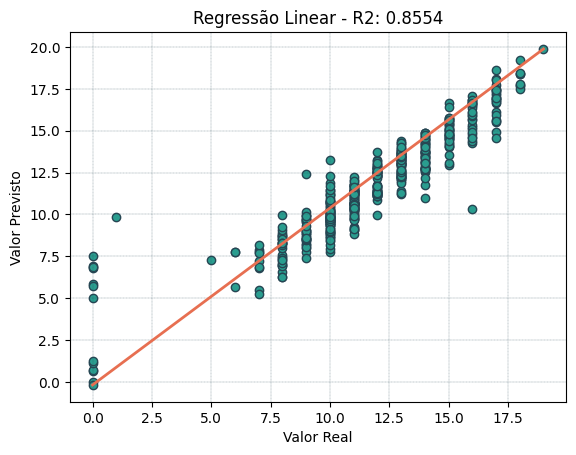

In [ ]:
# Fazer previsões no conjunto de treinamento
y_train_pred = model.predict(X_train)

# Calcular o R-quadrado para os dados de treinamento
r2_train = r2_score(y_train, y_train_pred)

# Plotar os valores reais em relação às previsões no conjunto de treinamento
plt.scatter(y_train, y_train_pred, color='#2A9D8F', edgecolors='#264653')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='#E76F51', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title(f'Regressão Linear - R2: {r2_train:.4f}')
plt.grid(color = '#264653', linestyle = '--', linewidth = 0.2)
plt.show()

### Métricas de avaliação do modelo


**R-quadrado (R2):**

O R-quadrado é uma métrica que indica o quão bem o modelo de regressão se ajusta aos dados. Ele varia de 0 a 1, onde 1 representa um ajuste perfeito do modelo aos dados. Quanto mais próximo de 1, melhor o modelo está explicando a variação nos dados.
Em termos simples, o R-quadrado mede a proporção da variação nos valores observados (reais) que é explicada pelo modelo. Por exemplo, se o R-quadrado for 0,6, significa que o modelo explica 60% da variação nos dados. O restante (40%) é devido a outros fatores não considerados pelo modelo.

**Erro Quadrático Médio (MSE):**

O Erro Quadrático Médio (MSE) é uma medida do **erro médio ao quadrado** entre as previsões do modelo e os valores reais. Ele calcula a diferença entre as previsões e os valores reais, eleva cada diferença ao quadrado, calcula a média desses valores quadrados e fornece o resultado final.
Em termos simples, o MSE mede o quão distantes as previsões do modelo estão dos valores reais. Quanto menor o valor do MSE, melhor é o ajuste do modelo aos dados. Um MSE igual a zero indicaria um ajuste perfeito, mas isso é raro na prática.

**Raiz Quadrada do Erro Quadrático Médio (RMSE):**

O RMSE é a raiz quadrada do MSE e é uma métrica frequentemente utilizada para interpretar o erro do modelo em uma escala mais intuitiva. Ao calcular a raiz quadrada do MSE, obtemos uma medida do erro médio entre as previsões e os valores reais na mesma escala dos dados originais.
Em outras palavras, o RMSE nos dá uma estimativa do erro típico (em termos das unidades da variável dependente) entre as previsões do modelo e os valores reais. Quanto menor o valor do RMSE, mais próximo as previsões do modelo estão dos valores reais e melhor é o ajuste do modelo.

Em resumo, R-quadrado mede o quão bem o modelo se ajusta aos dados (quanto mais próximo de 1, melhor), MSE mede o erro médio ao quadrado entre as previsões e os valores reais (quanto menor, melhor), e RMSE é a raiz quadrada do MSE, fornecendo uma medida do erro médio na mesma escala dos dados originais (quanto menor, melhor).







In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo utilizando R-quadrado (R2)
r2 = r2_score(y_test, y_pred)
print('---------------\n- R2 Score:', r2)

# Avaliar o modelo utilizando Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('---------------\n- Mean Squared Error (MSE):', mse)

# Avaliar o modelo utilizando Raiz Quadrada do Erro Quadrático Médio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('---------------\n- Root Mean Squared Error (RMSE):', rmse)

---------------
- R2 Score: 0.852631710385228
---------------
- Mean Squared Error (MSE): 1.437093704240999
---------------
- Root Mean Squared Error (RMSE): 1.1987884318097999


### Análise de Correlação:

A análise de correlação nos permite medir a relação entre duas variáveis. Podemos calcular a correlação entre cada variável independente (recurso) e a variável dependente (resultado da previsão) e examinar os valores de correlação para determinar a força e a direção da relação.
Valores de correlação próximos a 1 ou -1 indicam uma correlação forte, onde valores altos de uma variável estão associados a valores altos (1) ou baixos (-1) da variável dependente. Valores próximos a 0 indicam uma correlação fraca ou nula.

Podemos utilizar gráficos de dispersão ou calcular a matriz de correlação para visualizar e analisar as correlações. Variáveis com alta correlação com a variável dependente podem ter uma maior influência na previsão.



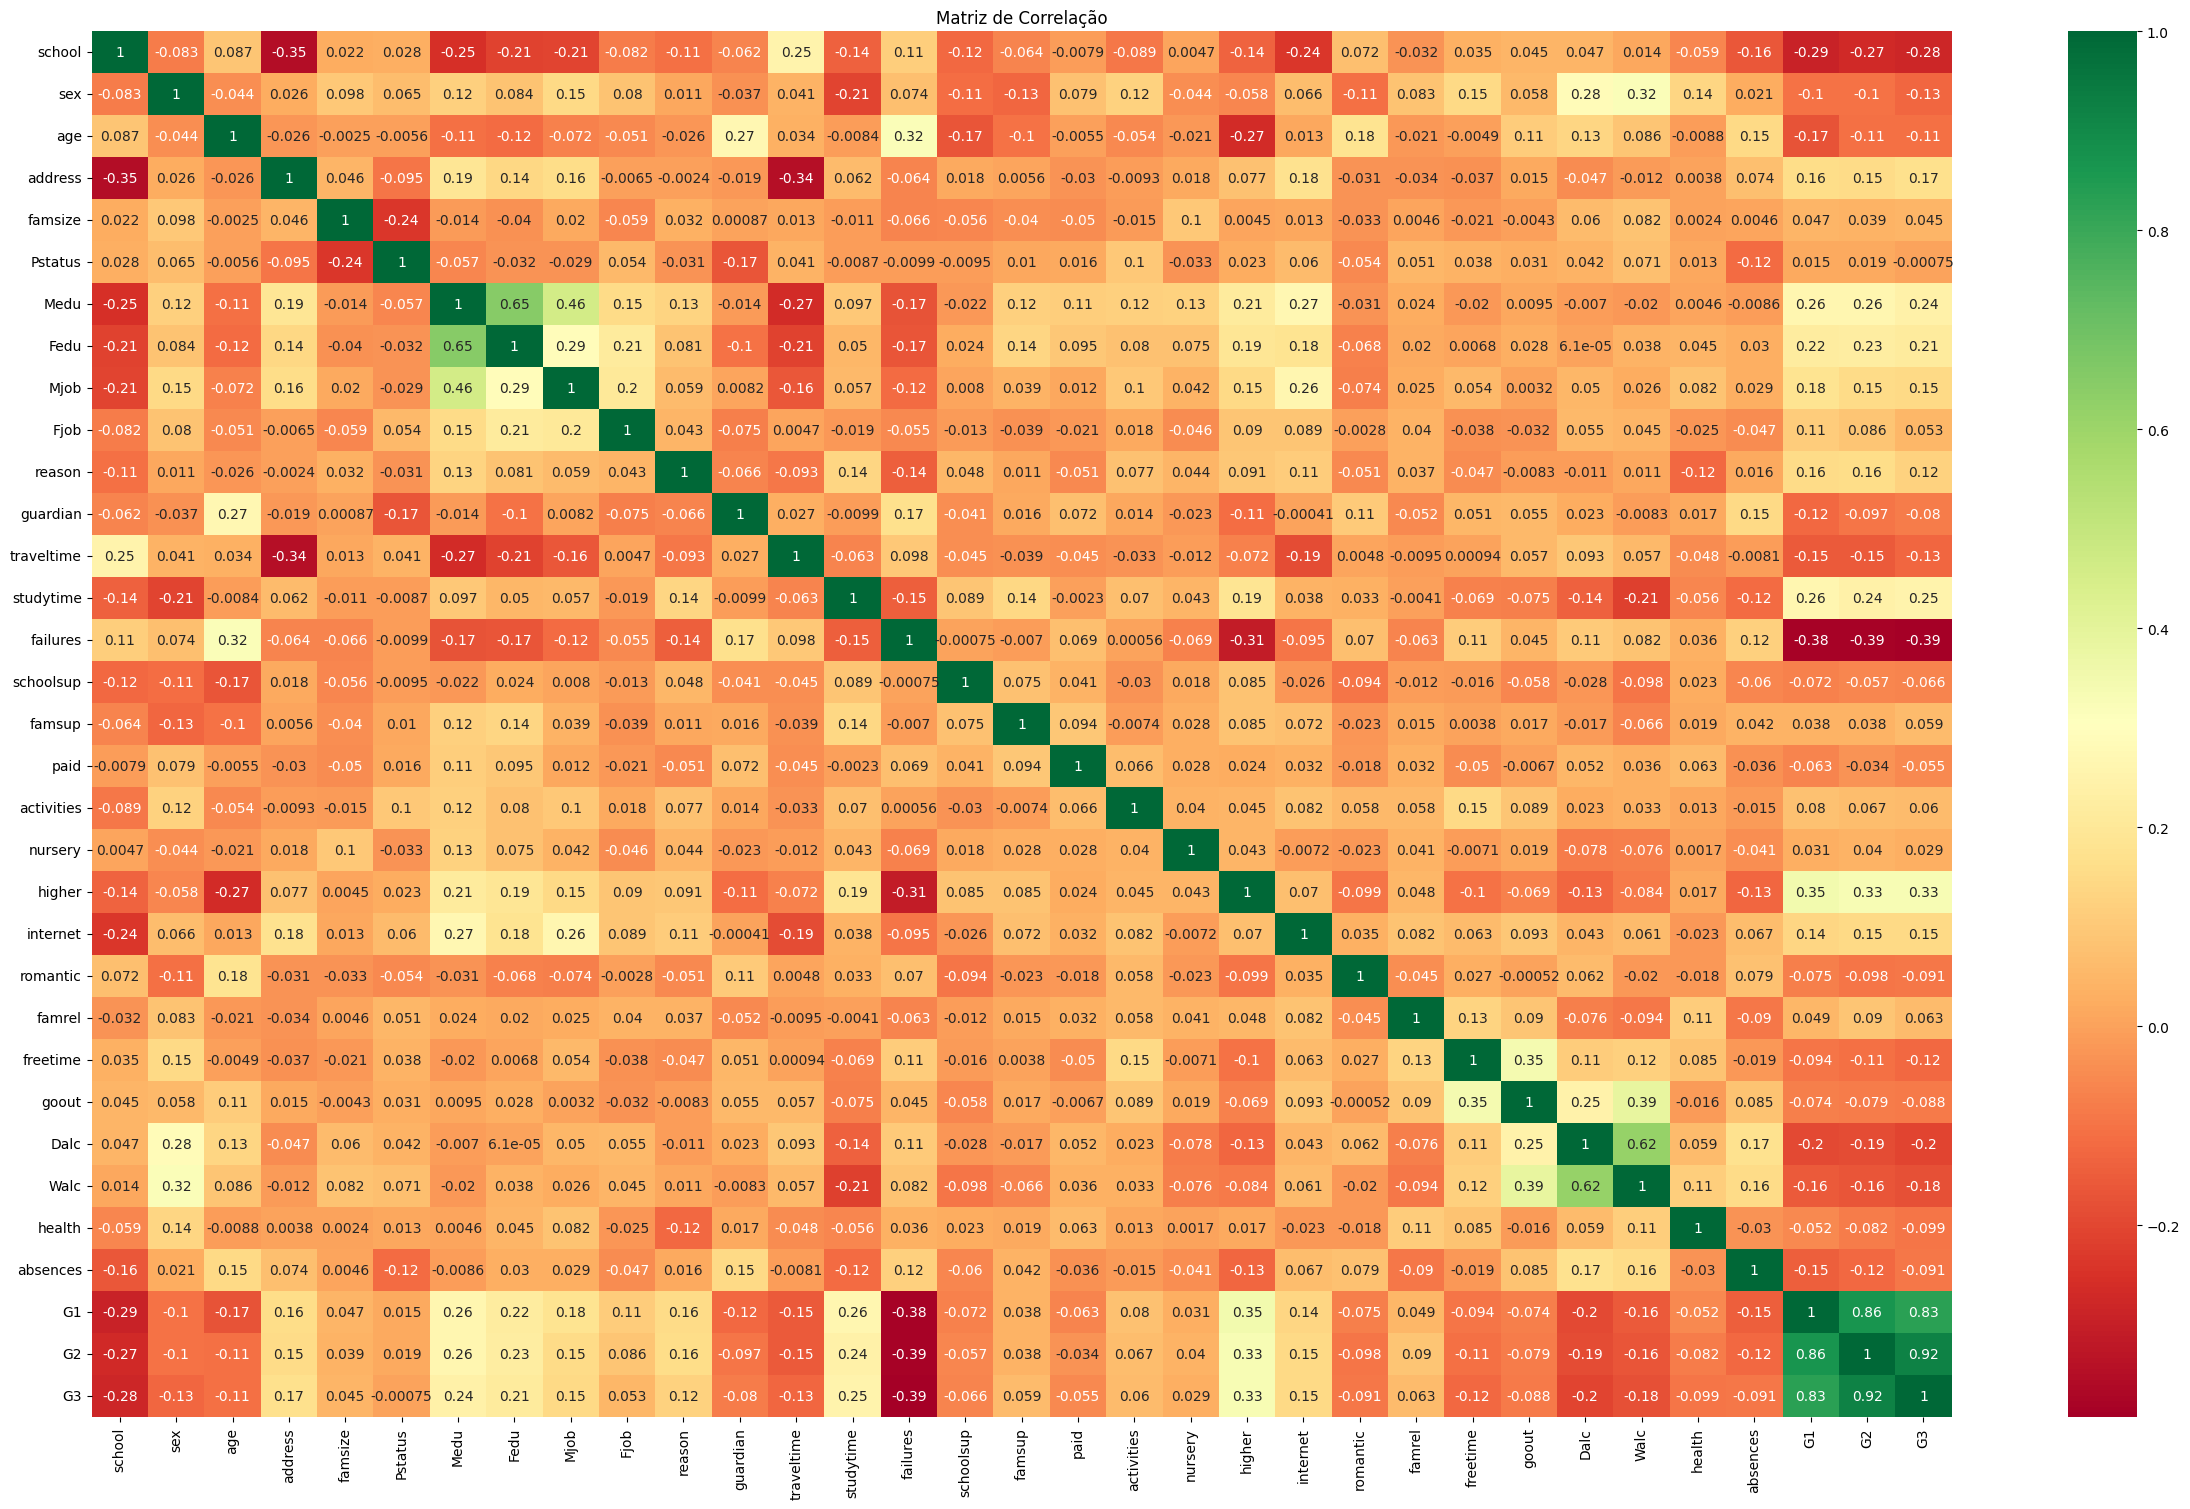

In [ ]:
corr_matrix = data.corr()

# Gerar o gráfico de matriz de correlação
plt.figure(figsize=(30, 18))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.title('Matriz de Correlação')
plt.show()